In [1]:
import numpy as np
import pandas as pd
import os
import requests
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [2]:
# Set up folder with data:
os.chdir('D:\\01_PROJECTS_sripts_code\\Electricty_Demand\\02_FORECAST')

In [3]:
#%% Function to extract code from GitHub:
def GetGitHubCode(GitUrl):

    response = requests.get(GitUrl) #get data from json file located at specified URL 

    if response.status_code == requests.codes.ok:
        contentOfUrl = response.content
        exec(contentOfUrl, globals() )
    else:
        print('Content was not found.')

In [4]:
# Download functions from GitHub:
GitUrl__Prepare_Data_For_Regression = 'https://raw.githubusercontent.com/kamilbanas85/Phyton_usefull_functions/main/Prepare_Data_For_Regression.py'
GetGitHubCode(GitUrl__Prepare_Data_For_Regression)

GitUrl__Make_TS_Regression = 'https://raw.githubusercontent.com/kamilbanas85/Phyton_usefull_functions/main/Make_TS_Regression.py'
GetGitHubCode(GitUrl__Make_TS_Regression)

GitUrl__Goodness_Of_Fit = 'https://raw.githubusercontent.com/kamilbanas85/Phyton_usefull_functions/main/Goodness_Of_Fit.py'
GetGitHubCode(GitUrl__Goodness_Of_Fit)

GitUrl__Multicollinearity_Check_Functions = 'https://raw.githubusercontent.com/kamilbanas85/Phyton_usefull_functions/main/Multicollinearity_Check_Functions.py'
GetGitHubCode(GitUrl__Multicollinearity_Check_Functions)

GitUrl__Feature_Selection = 'https://raw.githubusercontent.com/kamilbanas85/Phyton_usefull_functions/main/Feature_Selection.py'
GetGitHubCode(GitUrl__Feature_Selection)

GitUrl__ANN_Keras_functions = 'https://raw.githubusercontent.com/kamilbanas85/Phyton_usefull_functions/main/ANN_Keras_functions.py'
GetGitHubCode(GitUrl__ANN_Keras_functions)

In [5]:
# Read Analysis Data:
AnalysisData = pd.read_csv('AnalysisDF.csv',
                           parse_dates =['Date'],
                           index_col = 'Date')

AnalysisData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 63552 entries, 2015-07-01 01:00:00 to 2022-09-30 00:00:00
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Demand               63552 non-null  float64
 1   air_temperature      63552 non-null  float64
 2   humidity             63552 non-null  float64
 3   sky_cover            63552 non-null  float64
 4   wind_speed           63552 non-null  float64
 5   Population           63552 non-null  float64
 6   RealGDP              63552 non-null  float64
 7   DallasFedManufIndex  63552 non-null  float64
 8   WorkDay              63552 non-null  int64  
 9   hour                 63552 non-null  int64  
 10  day                  63552 non-null  int64  
 11  week                 63552 non-null  int64  
 12  month                63552 non-null  int64  
 13  HDD                  63552 non-null  int64  
 14  CDD                  63552 non-null  int64  
dtypes

In [6]:
##########################################################
##########################################################
#%% Prepare data
##########################################################
##########################################################

In [7]:
# Select Main Data
Dependent_Var = 'Demand'

Independent_Vars = ['HDD',
                    'CDD',
                    'wind_speed',
                    'humidity',
                    'sky_cover',
#                   'Population',
                    'RealGDP',
                    'DallasFedManufIndex',
                    'WorkDay',
                    'hour',
#                   'day',
                    'week'
#                   'month'
                   ]

DummyForColumn = ['hour','week']
LagList = None

In [8]:
### Cut data to pre-Covid time and crate 2 datasets to show diffrence between a summer and winter predictions

In [9]:
###################
#%% '01' model on summer time
###################

In [10]:
AnalysisData_01 = AnalysisData.loc[:'2019-07']   

In [11]:
TestSetDate_01 = '2019-02'

In [12]:
# Prepare Data For ANN
X_01, y_01 =  DevideOnXandY_CreateDummies(AnalysisData_01, 
                                          DependentVar = Dependent_Var,
                                          IndependentVar = Independent_Vars,
                                          DummyForCol = DummyForColumn,
                                          drop_first = False)

X_Train_sld_01, y_Train_sld_01,\
X_Test_sld_01, y_Test_sld_01,\
scaler_X_01, scaler_y_01 = \
            PrepareDataForRegression(X_01, y_01, 
                                     TestSplitInd = TestSetDate_01,
                                     ValSplitInd = None,     
                                     ScalerType = 'MinMax',
                                     ScalerRange = (0,1),                             
                                     BatchSize = None,
                                     WindowLength = 1)
            
            
y_Test_01 = AnalysisData.loc[y_Test_sld_01.index][['Demand']]

In [13]:
###################
#%% '02' model on winter time
###################

In [14]:
AnalysisData_02 = AnalysisData.loc[:'2020-02']

In [15]:
TestSetDate_02 = '2019-09'

In [16]:
# Prepare Data for ANN
X_02, y_02 =  DevideOnXandY_CreateDummies(AnalysisData_02, 
                                          DependentVar = Dependent_Var,
                                          IndependentVar = Independent_Vars,
                                          DummyForCol = DummyForColumn,
                                          drop_first = False)

X_Train_sld_02, y_Train_sld_02,\
X_Test_sld_02, y_Test_sld_02,\
scaler_X_02, scaler_y_02 = \
            PrepareDataForRegression(X_02, y_02, 
                                     TestSplitInd = TestSetDate_02,
                                     ValSplitInd = None,     
                                     ScalerType = 'MinMax',
                                     ScalerRange = (0,1),                             
                                     BatchSize = None,
                                     WindowLength = 1)
            
            
y_Test_02 = AnalysisData.loc[y_Test_sld_02.index][['Demand']]

In [17]:
##########################################################
##########################################################
#%% FIT MODEL - hyperparameter tuning
##########################################################
##########################################################

In [18]:
# Define parameters set
ParameterForSearch = dict(HiddenLayersNumber = [1,2,3,4,5],
                          NeuronsNumber = [25, 50, 150, 200, 250],\
                          InputShape = [(X_Train_sld_01.shape[1], )],
                          AddBatchNorm = [False, True],\
                          LossFun = ['mean_squared_error'],\
                          Opt = ['Adam()',
                                 'Nadam()',
                                 'SGD(learning_rate=0.01, decay=0.0, momentum=0.9, nesterov=False)',
                                 'SGD(learning_rate=0.1, decay=0.01, momentum=0.9, nesterov=False)',
                                 'SGD(learning_rate=0.1, decay=0.001, momentum=0.9, nesterov=False)'
                                ],\
                          ActivationFun = ['relu', 'LeakyReLU', 'ELU', 'swish'],\
                          ActivationOut = ['linear'],\
                          nb_epoch = [10,20,30,50,70,90,110],\
                          batch_size = [10,20,50,70],
                          DropoutValue = [0.2],\
                          init = ['glorot_uniform', 'uniform','normal'] )

In [19]:
###################
#%% '01' model on summer time
###################

In [21]:
#Final_Model_01.reset_states()

# Define wrapper
WrapedANNmodel_01 = KerasRegressor(build_fn = CreateFeedForwardModel)

# Search hyperparamers
ANNmodel_RandomSearch_01 = RandomizedSearchCV(WrapedANNmodel_01,\
                                              ParameterForSearch,\
                                              n_iter = 50,\
                                              cv = TimeSeriesSplit(n_splits=8).split(X_Train_sld_01),\
                                              verbose=1,\
                                              n_jobs=-1)

ANNmodel_RandomSearch_01.fit( X_Train_sld_01, y_Train_sld_01 )

# Print the best parameters
print("Best parameters found: ", ANNmodel_RandomSearch_01.best_params_)

Fitting 8 folds for each of 50 candidates, totalling 400 fits


C:\Users\kamil\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [-0.0426907  -0.00784394 -0.03616305 -0.00630624 -0.01602818 -0.03820358
 -0.03325046 -0.00984296 -0.00915798 -0.03357234 -0.00904516 -0.00648964
 -0.00882909 -0.01647764 -0.00663354 -0.02601517 -0.02354727 -0.00692637
         nan -0.01112367 -0.04173519 -0.02168929 -0.0415493  -0.00755341
 -0.00742998 -0.00733375 -0.03255252 -0.04189562 -0.0092117  -0.00570061
 -0.00644686 -0.04022701 -0.03073574 -0.00735679         nan -0.00836571
 -0.0100774  -0.04026493 -0.00767943 -0.04110975 -0.00807884 -0.0434084
 -0.01554122 -0.02740653 -0.04217818         nan -0.0090014  -0.01656927
 -0.00733676 -0.04164672]
  warnings.warn(


3147/3147 [==============================] - 6s 2ms/step - loss: 0.0041 - mean_squared_error: 0.0041 - lr: 2.0713e-04
Best parameters found:  {'nb_epoch': 110, 'init': 'uniform', 'batch_size': 10, 'Opt': 'Nadam()', 'NeuronsNumber': 200, 'LossFun': 'mean_squared_error', 'InputShape': (85,), 'HiddenLayersNumber': 3, 'DropoutValue': 0.2, 'AddBatchNorm': False, 'ActivationOut': 'linear', 'ActivationFun': 'LeakyReLU'}


In [22]:
# Extract the best model
Final_Model_01 = ANNmodel_RandomSearch_01.best_estimator_

In [23]:
###################
#%% '02' model on winter time
###################

In [24]:
Final_Model_02 = \
    CreateFeedForwardModel(\
            HiddenLayersNumber = ANNmodel_RandomSearch_01.best_params_['HiddenLayersNumber'],\
            NeuronsNumber      = ANNmodel_RandomSearch_01.best_params_['NeuronsNumber'],\
            InputShape         = ANNmodel_RandomSearch_01.best_params_['InputShape'],\
            AddBatchNorm       = ANNmodel_RandomSearch_01.best_params_['AddBatchNorm'],\
            LossFun            = ANNmodel_RandomSearch_01.best_params_['LossFun'],\
            Opt                = ANNmodel_RandomSearch_01.best_params_['Opt'],\
            ActivationFun      = ANNmodel_RandomSearch_01.best_params_['ActivationFun'],\
            DropoutValue       = ANNmodel_RandomSearch_01.best_params_['DropoutValue'],\
            init               = ANNmodel_RandomSearch_01.best_params_['init']
                           )

# Train model on new dataset
Final_Model_02.fit(X_Train_sld_02, y_Train_sld_02,\
                   epochs = ANNmodel_RandomSearch_01.best_params_['nb_epoch'],\
                   batch_size = ANNmodel_RandomSearch_01.best_params_['batch_size'])

Epoch 1/110
3656/3656 [==============================] - 5s 1ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - lr: 1.8784e-04
Epoch 2/110
3656/3656 [==============================] - 5s 1ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - lr: 4.5170e-05
Epoch 3/110
3656/3656 [==============================] - 5s 1ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - lr: 2.6967e-05
Epoch 4/110
3656/3656 [==============================] - 5s 1ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - lr: 1.9289e-05
Epoch 5/110
3656/3656 [==============================] - 6s 2ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - lr: 1.5028e-05
Epoch 6/110
3656/3656 [==============================] - 5s 1ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - lr: 1.2313e-05
Epoch 7/110
3656/3656 [==============================] - 6s 2ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - lr: 1.0431e-05
Epoch 8/110
3656/3656 [==============================] - 6s 2ms/step - loss: 0.0019 - mean

In [25]:
##########################################################
##########################################################
#%% Check Model - Test Set
##########################################################
##########################################################

In [26]:
###################
#%% test '01' model on summer time
###################

In [27]:
# Make prediction on test set
yhat_Test_ANN_01, X_Test_ANN_01 = \
     MakeTSforecast(X_Test_sld_01,\
                    Model = Final_Model_01,\
                    DependentVar = Dependent_Var,\
                    Intecept = False,\
                    LagsList = LagList,\
                    Scaler_y = scaler_y_01,\
                    Scaler_X = scaler_X_01,\
                    Test_or_Forecast = 'Test')

    
DataWithPrediction_01 =\
    MakeANNfinalData(Model = Final_Model_01,\
                     Train_X_Scaled = X_Train_sld_01,\
                     Val_X_Scaled = None,\
                     Scaler_y = scaler_y_01,\
                     MainDF = AnalysisData_01,\
                     yhat_Test_DF = yhat_Test_ANN_01,\
                     yhat_Forecast_DF = None)

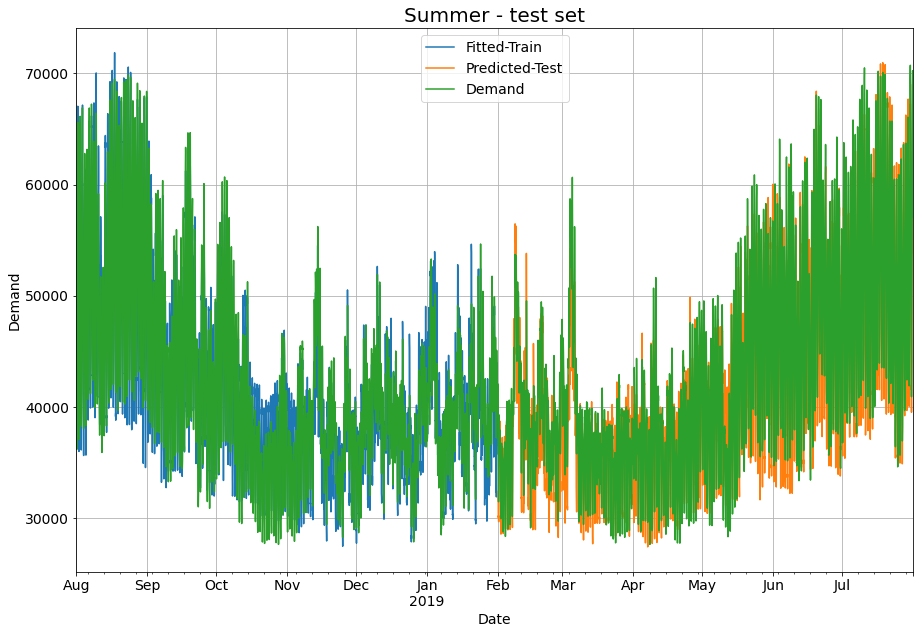

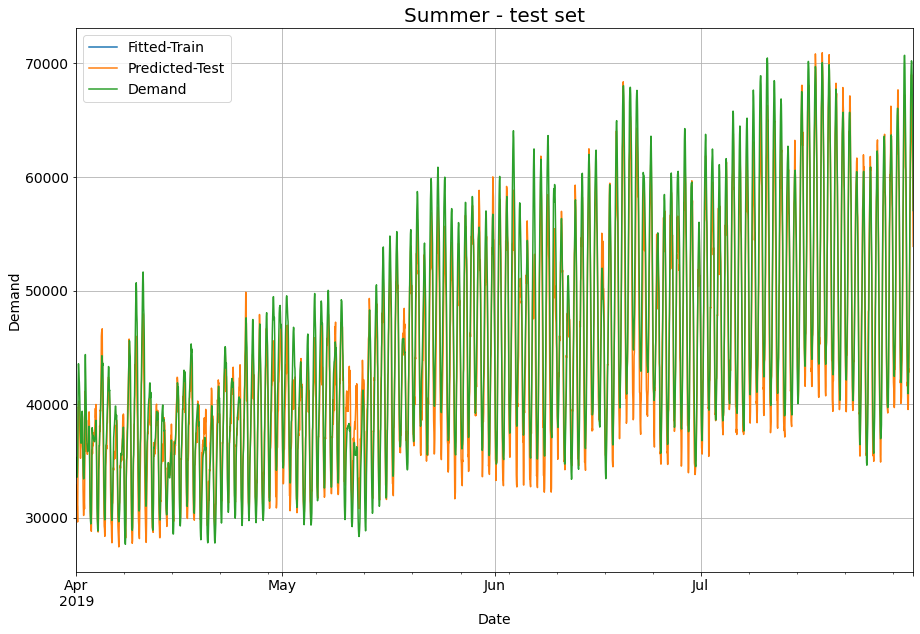

In [29]:
# Plot Fitted Data
DataWithPrediction_01[['Fitted-Train','Predicted-Test',Dependent_Var]]\
                    .loc['2018-08':].plot()
                

plt.ylabel('Demand', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Summer - test set', fontsize=20)
plt.legend(fontsize=14)
plt.grid()
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()



DataWithPrediction_01[['Fitted-Train','Predicted-Test',Dependent_Var]]\
                    .loc['2019-04':].plot()

plt.ylabel('Demand', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Summer - test set', fontsize=20)
plt.legend(fontsize=14)
plt.grid()
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

In [30]:
print( CalculateR2andR2adj(y_Test_01, yhat_Test_ANN_01, X_Test_sld_01, const = False) )
print('')
print( f'MAE:  {round(mean_absolute_error(y_Test_01, yhat_Test_ANN_01),2)}'  )
print( f'MAPE: {round(mean_absolute_percentage_error(y_Test_01, yhat_Test_ANN_01)*100,2)}' )
print( f'RSME: {round(np.sqrt(mean_squared_error(y_Test_01, yhat_Test_ANN_01)),2)}' )

R2: 0.9288
R2_adj: 0.9273
(0.9288, 0.9273)

MAE:  1961.3
MAPE: 4.5
RSME: 2514.73


In [31]:
###################
#%% test '02' model on winter time
###################

In [32]:
# Make prediction on test set
yhat_Test_ANN_02, X_Test_ANN_02 = \
     MakeTSforecast(X_Test_sld_02,\
                    Model = Final_Model_02,\
                    DependentVar = Dependent_Var,\
                    Intecept = False,\
                    LagsList = LagList,\
                    Scaler_y = scaler_y_02,\
                    Scaler_X = scaler_X_02,\
                    Test_or_Forecast = 'Test')

    
DataWithPrediction_02 =\
    MakeANNfinalData(Model = Final_Model_02,\
                     Train_X_Scaled = X_Train_sld_02,\
                     Val_X_Scaled = None,\
                     Scaler_y = scaler_y_02,\
                     MainDF = AnalysisData_02,\
                     yhat_Test_DF = yhat_Test_ANN_02,\
                     yhat_Forecast_DF = None)

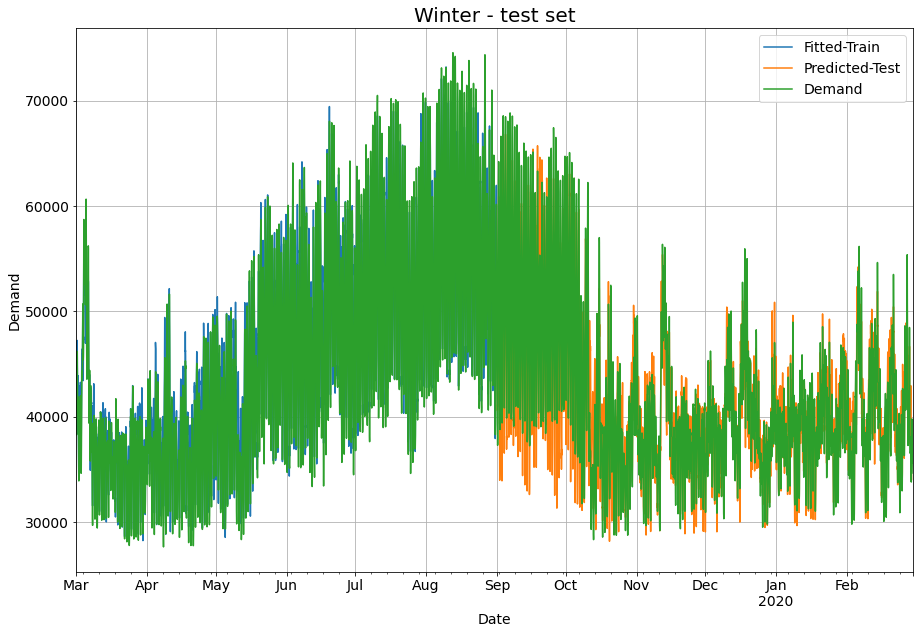

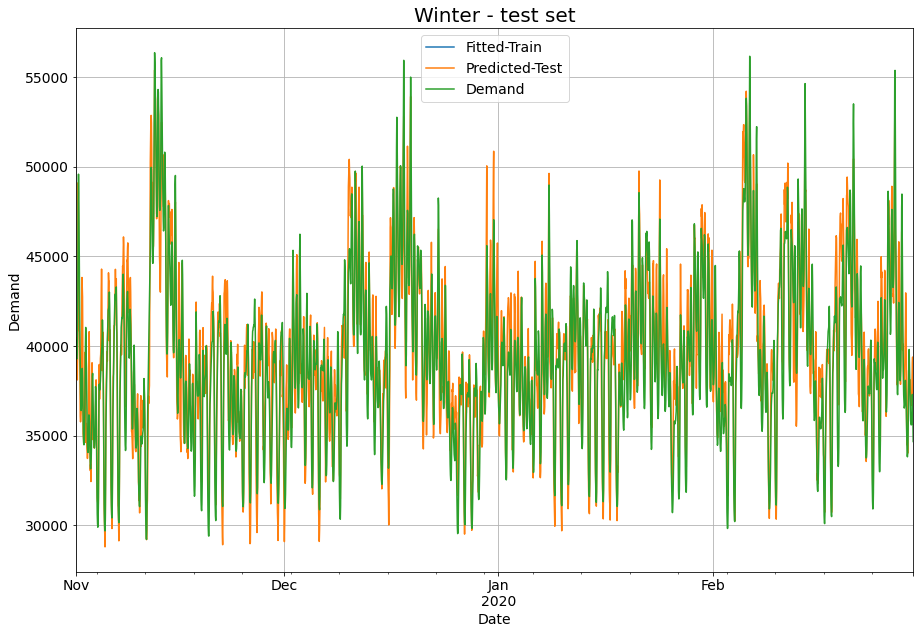

In [33]:
# Plot Fitted Data
DataWithPrediction_02[['Fitted-Train','Predicted-Test',Dependent_Var]]\
                                .loc['2019-03':].plot()       
        

plt.ylabel('Demand', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Winter - test set', fontsize=20)
plt.legend(fontsize=14)
plt.grid()
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()




DataWithPrediction_02[['Fitted-Train','Predicted-Test',Dependent_Var]]\
                    .loc['2019-11':].plot()


plt.ylabel('Demand', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Winter - test set', fontsize=20)
plt.legend(fontsize=14)
plt.grid()
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

In [34]:
print( CalculateR2andR2adj(y_Test_02, yhat_Test_ANN_02, X_Test_sld_02, const = False) )
print('')
print( f'MAE:  {round(mean_absolute_error(y_Test_02, yhat_Test_ANN_02),2)}'  )
print( f'MAPE: {round(mean_absolute_percentage_error(y_Test_02, yhat_Test_ANN_02)*100,2)}' )
print( f'RSME: {round(np.sqrt(mean_squared_error(y_Test_02, yhat_Test_ANN_02)),2)}' )

R2: 0.91
R2_adj: 0.9082
(0.91, 0.9082)

MAE:  1791.97
MAPE: 4.3
RSME: 2340.55
